Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load CSV File

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')
df

,tweet_id,tweet_concept,tweet_sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


2) Clean the dataset with different data pre-processing

In [4]:
import nltk

# দরকারি NLTK রিসোর্স ডাউনলোড করা
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
!pip install --upgrade nltk
!python -m nltk.downloader punkt stopwords wordnet


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt_tab')
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# প্রথমবার রান করলে নিচের লাইনটি চালাতে হবে
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")


train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')
valid_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_validation.csv')

# 1. মিসিং ভ্যালু রিমুভ করা
train_df.dropna(inplace=True)
valid_df.dropna(inplace=True)

# 2. ডুপ্লিকেট রিমুভ করা
train_df.drop_duplicates(inplace=True)
valid_df.drop_duplicates(inplace=True)

# 3. টেক্সট ক্লিনিং ফাংশন
def clean_text(text):
    text = text.lower()  # ছোট হাতের অক্ষরে রূপান্তর
    text = re.sub(r'\d+', '', text)  # সংখ্যা রিমুভ
    text = text.translate(str.maketrans("", "", string.punctuation))  # পাংচুয়েশন রিমুভ
    text = re.sub(r'\s+', ' ', text).strip()  # বাড়তি স্পেস রিমুভ
    return text

# 4. স্টপওয়ার্ড ফিল্টার করা
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

# 5. স্টেমিং ও লেমাটাইজেশন
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stemming(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

def lemmatization(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# 6. প্রি-প্রসেসিং প্রয়োগ করা
train_df['clean_text'] = train_df.iloc[:, -1].astype(str).apply(clean_text).apply(remove_stopwords).apply(lemmatization)
valid_df['clean_text'] = valid_df.iloc[:, -1].astype(str).apply(clean_text).apply(remove_stopwords).apply(lemmatization)

# ক্লিন করা ডেটাসেট দেখানো
print(train_df.head())
print(valid_df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   tweet_id  tweet_concept  tweet_sentiment  \
0      2401    Borderlands         Positive   
1      2401    Borderlands         Positive   
2      2401    Borderlands         Positive   
3      2401    Borderlands         Positive   
4      2401    Borderlands         Positive   

                                               tweet  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                     clean_text  
0  im getting borderland murder  
1            coming border kill  
2    im getting borderland kill  
3   im coming borderland murder  
4  im getting borderland murder  
   tweet_id  tweet_concept  tweet_sentiment  \
0      3364       Facebook       Irrelevant   
1       352         Amazon          Neutral   
2      8312      Microsoft         

3) Tokenize the dataset tweet with appropriate nltk function

In [10]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download("punkt")
train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')
valid_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_validation.csv')

train_tweets = train_df.iloc[:, -1].astype(str)
valid_tweets = valid_df.iloc[:, -1].astype(str)

# Sentence Tokenization
train_sentences = train_tweets.apply(sent_tokenize)
valid_sentences = valid_tweets.apply(sent_tokenize)

# Word Tokenization
train_words = train_tweets.apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4) Use tf-idf to vectorize the tokens of each tweet

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize

train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')
valid_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_validation.csv')

# টুইট ডেটা (সর্বশেষ কলাম ধরে নিচ্ছি)
train_tweets = train_df.iloc[:, -1].astype(str)
valid_tweets = valid_df.iloc[:, -1].astype(str)

# টোকেনাইজেশন
train_tweets = train_tweets.apply(word_tokenize)
valid_tweets = valid_tweets.apply(word_tokenize)

# টোকেনগুলো স্ট্রিং আকারে যোগ করে TF-IDF এর জন্য প্রস্তুত করা
train_tweets = train_tweets.apply(lambda x: " ".join(x))
valid_tweets = valid_tweets.apply(lambda x: " ".join(x))

# TF-IDF ভেক্টরাইজার তৈরি করা
tfidf_vectorizer = TfidfVectorizer()

# ট্রেন ও ভ্যালিডেশন ডেটার জন্য TF-IDF ফিচার এক্সট্রাকশন
train_tfidf = tfidf_vectorizer.fit_transform(train_tweets)
valid_tfidf = tfidf_vectorizer.transform(valid_tweets)

# TF-IDF ফিচার ভেক্টর দেখানো
print("Shape of Train TF-IDF Matrix:", train_tfidf.shape)
print("Shape of Validation TF-IDF Matrix:", valid_tfidf.shape)

# প্রথম ৫টি টুইটের TF-IDF ভেক্টর দেখানো
print("First 5 Train TF-IDF Vectors:\n", train_tfidf[:5].toarray())


Shape of Train TF-IDF Matrix: (74682, 31059)
Shape of Validation TF-IDF Matrix: (1000, 31059)
First 5 Train TF-IDF Vectors:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


5) Apply the following machine learning model
5.a Support Vector Machine

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.tokenize import word_tokenize

# NLTK ডাটা ডাউনলোড করা (যদি প্রয়োজন হয়)
nltk.download("punkt")

train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')

# ডেটাসেটের প্রথম কয়টি কলাম দেখানো (কলাম চেক করার জন্য)
print("Dataset Columns:", train_df.columns)

# ধরে নিচ্ছি, টেক্সট ডেটা শেষ কলামে এবং লেবেল দ্বিতীয় কলামে আছে
X = train_df.iloc[:, -1].astype(str)  # টুইট টেক্সট
y = train_df.iloc[:, 1]  # লেবেল (Sentiment)

# টোকেনাইজেশন (শব্দ বিভক্ত করা)
X = X.apply(word_tokenize)

# টোকেনগুলোকে একত্রে যোগ করে স্ট্রিং তৈরি করা
X = X.apply(lambda x: " ".join(x))

# TF-IDF ভেক্টরাইজার
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# ট্রেন-টেস্ট স্প্লিট (80% ট্রেন, 20% টেস্ট)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# SVM মডেল তৈরি করা
svm_model = SVC(kernel='linear')

# মডেল ট্রেন করা
svm_model.fit(X_train, y_train)

# টেস্ট সেটের উপর প্রেডিকশন
y_pred = svm_model.predict(X_test)

# একুরেসি ও রিপোর্ট দেখানো
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset Columns: Index(['tweet_id', ' tweet_concept', ' tweet_sentiment', ' tweet'], dtype='object')
Model Accuracy: 0.8730
Classification Report:
                                    precision    recall  f1-score   support

                           Amazon       0.87      0.93      0.90       463
                      ApexLegends       0.82      0.82      0.82       477
                   AssassinsCreed       0.85      0.87      0.86       419
                      Battlefield       0.93      0.87      0.90       468
                      Borderlands       0.90      0.90      0.90       451
                            CS-GO       0.89      0.85      0.87       427
                       CallOfDuty       0.86      0.87      0.87       477
        CallOfDutyBlackopsColdWar       0.55      0.82      0.66       481
                    Cyberpunk2077       0.80      0.81      0.81       462
                            Dota2       0.81      0.86      0.83       474
                          

5.b Decision Tree

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.tokenize import word_tokenize

# NLTK ডাটা ডাউনলোড (যদি না করা থাকে)
nltk.download("punkt")

# ডেটাসেট লোড করা
train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')

# ডেটাসেটের কলাম চেক করা
print("Dataset Columns:", train_df.columns)

# ধরে নিচ্ছি, টেক্সট ডেটা শেষ কলামে এবং লেবেল দ্বিতীয় কলামে আছে
X = train_df.iloc[:, -1].astype(str)  # টুইট টেক্সট
y = train_df.iloc[:, 1]  # লেবেল (Sentiment)

# টোকেনাইজেশন
X = X.apply(word_tokenize)

# টোকেনগুলোকে স্ট্রিং আকারে রূপান্তর করা
X = X.apply(lambda x: " ".join(x))

# TF-IDF ভেক্টরাইজেশন
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# ট্রেন-টেস্ট স্প্লিট (৮০% ট্রেনিং, ২০% টেস্ট)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Decision Tree মডেল তৈরি করা
dt_model = DecisionTreeClassifier()

# মডেল ট্রেন করা
dt_model.fit(X_train, y_train)

# টেস্ট সেটের উপর প্রেডিকশন
y_pred = dt_model.predict(X_test)

# একুরেসি ও রিপোর্ট দেখানো
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset Columns: Index(['tweet_id', ' tweet_concept', ' tweet_sentiment', ' tweet'], dtype='object')
Model Accuracy: 0.8042
Classification Report:
                                    precision    recall  f1-score   support

                           Amazon       0.74      0.89      0.81       463
                      ApexLegends       0.77      0.78      0.78       477
                   AssassinsCreed       0.79      0.77      0.78       419
                      Battlefield       0.88      0.81      0.85       468
                      Borderlands       0.84      0.85      0.84       451
                            CS-GO       0.79      0.78      0.78       427
                       CallOfDuty       0.82      0.78      0.80       477
        CallOfDutyBlackopsColdWar       0.66      0.68      0.67       481
                    Cyberpunk2077       0.76      0.72      0.74       462
                            Dota2       0.79      0.74      0.77       474
                          

5.C Random Forest

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.tokenize import word_tokenize

# NLTK ডাটা ডাউনলোড করা (যদি প্রয়োজন হয়)
nltk.download("punkt")

# ডেটাসেট লোড করা
train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')

# ডেটাসেটের কলাম চেক করা
print("Dataset Columns:", train_df.columns)

# ধরে নিচ্ছি, টেক্সট ডেটা শেষ কলামে এবং লেবেল দ্বিতীয় কলামে আছে
X = train_df.iloc[:, -1].astype(str)  # টুইট টেক্সট
y = train_df.iloc[:, 1]  # লেবেল (Sentiment)

# টোকেনাইজেশন
X = X.apply(word_tokenize)

# টোকেনগুলোকে স্ট্রিং আকারে রূপান্তর করা
X = X.apply(lambda x: " ".join(x))

# TF-IDF ভেক্টরাইজেশন
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# ট্রেন-টেস্ট স্প্লিট (৮০% ট্রেনিং, ২০% টেস্ট)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Random Forest মডেল তৈরি করা
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # ১০০টি Decision Tree ব্যবহার

# মডেল ট্রেন করা
rf_model.fit(X_train, y_train)

# টেস্ট সেটের উপর প্রেডিকশন
y_pred = rf_model.predict(X_test)

# একুরেসি ও রিপোর্ট দেখানো
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset Columns: Index(['tweet_id', ' tweet_concept', ' tweet_sentiment', ' tweet'], dtype='object')
Model Accuracy: 0.9133
Classification Report:
                                    precision    recall  f1-score   support

                           Amazon       0.90      0.95      0.92       463
                      ApexLegends       0.88      0.91      0.90       477
                   AssassinsCreed       0.93      0.91      0.92       419
                      Battlefield       0.96      0.91      0.93       468
                      Borderlands       0.96      0.93      0.95       451
                            CS-GO       0.93      0.89      0.91       427
                       CallOfDuty       0.94      0.91      0.93       477
        CallOfDutyBlackopsColdWar       0.84      0.85      0.84       481
                    Cyberpunk2077       0.91      0.86      0.89       462
                            Dota2       0.89      0.90      0.90       474
                          

Multinomial Naive Bayes

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import nltk

nltk.download("punkt")

# 📌 ডেটাসেট লোড করা
train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')

# 🔍 টেক্সট ও লেবেল নির্বাচন
X = train_df.iloc[:, -1].astype(str)  # টুইট টেক্সট
y = train_df.iloc[:, 1]  # লেবেল

# 📝 টোকেনাইজেশন এবং প্রিপ্রোসেসিং
X = X.apply(word_tokenize).apply(lambda x: " ".join(x))

# 🔢 TF-IDF ভেক্টরাইজেশন
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 🎯 ট্রেন-টেস্ট স্প্লিট (৮০% ট্রেনিং, ২০% টেস্ট)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 🚀 Multinomial Naïve Bayes মডেল ট্রেনিং
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


MultinomialNB()

Do hyperparameter tuning to find the best hyperparameter to tune the model.

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')

# Clean column names and handle missing values
train_df.columns = train_df.columns.str.strip()
train_df["tweet"] = train_df["tweet"].fillna("").astype(str)

# Label encoding
label_encoder = LabelEncoder()
train_df["tweet_sentiment"] = label_encoder.fit_transform(train_df["tweet_sentiment"])

# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["tweet"])
y_train = train_df["tweet_sentiment"]

# Define parameter grid for hyperparameter tuning
param_grid = {
    "alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]  # Different smoothing values for Naive Bayes
}

# Perform Grid Search CV
mnb_model = MultinomialNB()
grid_search = GridSearchCV(mnb_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best hyperparameter
best_alpha = grid_search.best_params_["alpha"]
print(f"✅ Best Alpha Found: {best_alpha}")

# Train final model with best hyperparameter
best_mnb_model = MultinomialNB(alpha=best_alpha)
best_mnb_model.fit(X_train_tfidf, y_train)

# Training accuracy
train_predictions = best_mnb_model.predict(X_train_tfidf)
accuracy = accuracy_score(y_train, train_predictions)
print(f"📊 Training Accuracy with Best Alpha ({best_alpha}): {accuracy:.2%}")


✅ Best Alpha Found: 5.0
📊 Training Accuracy with Best Alpha (5.0): 67.13%


7 Use twitter_validation.csv to test the model.

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Load training dataset
train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')

# Clean column names and handle missing values
train_df.columns = train_df.columns.str.strip()
train_df["tweet"] = train_df["tweet"].fillna("").astype(str)

# Label encoding
label_encoder = LabelEncoder()
train_df["tweet_sentiment"] = label_encoder.fit_transform(train_df["tweet_sentiment"])

# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["tweet"])
y_train = train_df["tweet_sentiment"]

# Hyperparameter tuning using GridSearchCV
param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
mnb_model = MultinomialNB()
grid_search = GridSearchCV(mnb_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best hyperparameter
best_alpha = grid_search.best_params_["alpha"]
print(f"✅ Best Alpha Found: {best_alpha}")

# Train best model
best_mnb_model = MultinomialNB(alpha=best_alpha)
best_mnb_model.fit(X_train_tfidf, y_train)

# Load validation dataset
val_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_validation.csv')

# Clean validation dataset
val_df.columns = val_df.columns.str.strip()
val_df["tweet"] = val_df["tweet"].fillna("").astype(str)

# Encode validation labels
val_df["tweet_sentiment"] = label_encoder.transform(val_df["tweet_sentiment"])

# Transform validation data using the trained TF-IDF vectorizer
X_val_tfidf = tfidf_vectorizer.transform(val_df["tweet"])
y_val = val_df["tweet_sentiment"]

# Predict validation dataset
val_predictions = best_mnb_model.predict(X_val_tfidf)

# Compute accuracy
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"📊 Validation Accuracy: {val_accuracy:.2%}")

# Classification report
print("🔍 Classification Report:")
print(classification_report(y_val, val_predictions, target_names=label_encoder.classes_))

✅ Best Alpha Found: 5.0
📊 Validation Accuracy: 69.60%
🔍 Classification Report:
              precision    recall  f1-score   support

  Irrelevant       1.00      0.26      0.41       172
    Negative       0.60      0.91      0.72       266
     Neutral       0.85      0.59      0.70       285
    Positive       0.68      0.87      0.76       277

    accuracy                           0.70      1000
   macro avg       0.78      0.66      0.65      1000
weighted avg       0.76      0.70      0.67      1000



8 Use appropriate evaluation methods to evaluate the model accuracy and other
performance

🔹 Model Accuracy: 0.8140
📊 Classification Report:
                                    precision    recall  f1-score   support

                           Amazon       0.78      0.85      0.81       463
                      ApexLegends       0.85      0.70      0.77       477
                   AssassinsCreed       0.79      0.80      0.80       419
                      Battlefield       0.93      0.79      0.85       468
                      Borderlands       0.79      0.90      0.84       451
                            CS-GO       0.81      0.84      0.82       427
                       CallOfDuty       0.80      0.81      0.80       477
        CallOfDutyBlackopsColdWar       0.74      0.64      0.69       481
                    Cyberpunk2077       0.80      0.72      0.76       462
                            Dota2       0.83      0.74      0.78       474
                             FIFA       0.88      0.83      0.85       449
                         Facebook       0.80    

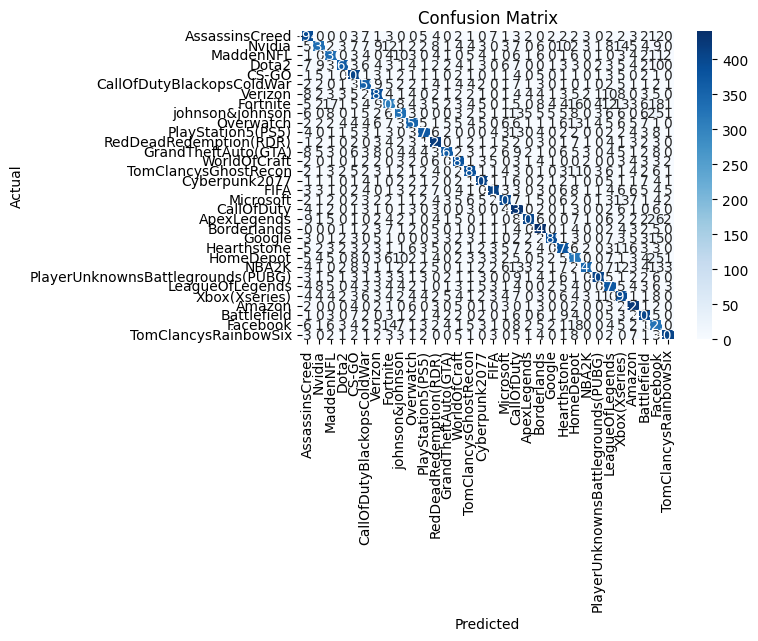

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔮 মডেল দ্বারা প্রেডিকশন করা
y_pred = nb_model.predict(X_test)

# ✅ ১. একুরেসি স্কোর
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Model Accuracy: {accuracy:.4f}")

# ✅ ২. ক্লাসিফিকেশন রিপোর্ট
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ ৩. কনফিউশন ম্যাট্রিক্স তৈরি করা
conf_matrix = confusion_matrix(y_test, y_pred)

# 🔥 কনফিউশন ম্যাট্রিক্স ভিজুয়ালাইজ করা
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

9) Visualize the evaluation with appropriate visualization functions.

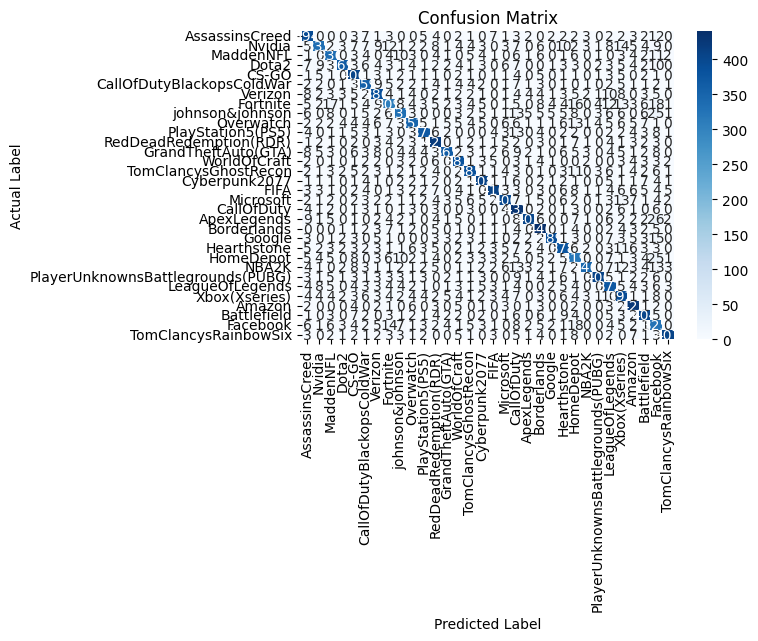

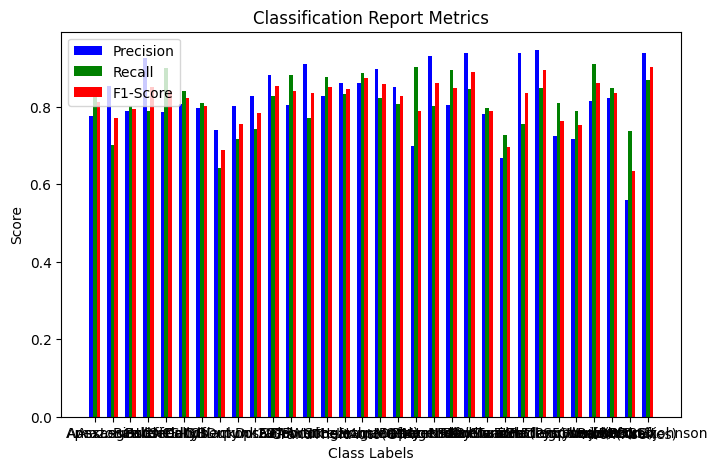

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🔮 মডেল দ্বারা প্রেডিকশন করা
y_pred = nb_model.predict(X_test)

# ✅ ১. কনফিউশন ম্যাট্রিক্স প্লট করা
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# ✅ ২. ক্লাসিফিকেশন রিপোর্ট বার চার্ট হিসাবে দেখানো
report = classification_report(y_test, y_pred, output_dict=True)

# Precision, Recall & F1-score এক্সট্রাক্ট করা
labels = list(report.keys())[:-3]  # Support, Accuracy বাদ দিচ্ছি
precision = [report[label]["precision"] for label in labels]
recall = [report[label]["recall"] for label in labels]
f1_score = [report[label]["f1-score"] for label in labels]

# 🔥 বার চার্ট প্লট করা
x = np.arange(len(labels))
width = 0.2  # বারগুলোর প্রস্থ

plt.figure(figsize=(8, 5))
plt.bar(x - width, precision, width=width, label="Precision", color="blue")
plt.bar(x, recall, width=width, label="Recall", color="green")
plt.bar(x + width, f1_score, width=width, label="F1-Score", color="red")

plt.xticks(ticks=x, labels=labels)
plt.xlabel("Class Labels")
plt.ylabel("Score")
plt.title("Classification Report Metrics")
plt.legend()
plt.show()


10) Suggest the BEST algorithm.

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
from nltk.tokenize import word_tokenize

nltk.download("punkt")

# 📌 1️⃣ ডেটাসেট লোড করা
train_df = pd.read_csv('/content/drive/MyDrive/Data Set/twitter_training.csv')

# 🔍 টেক্সট ও লেবেল নির্বাচন
X = train_df.iloc[:, -1].astype(str)  # টুইট টেক্সট
y = train_df.iloc[:, 1]  # লেবেল

# 📝 2️⃣ টোকেনাইজেশন এবং প্রিপ্রোসেসিং
X = X.apply(word_tokenize).apply(lambda x: " ".join(x))

# 🔢 3️⃣ TF-IDF ভেক্টরাইজেশন
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# 🎯 4️⃣ ট্রেন-টেস্ট স্প্লিট (৮০% ট্রেনিং, ২০% টেস্ট)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 🔥 5️⃣ বিভিন্ন মডেলের জন্য লুপ চালানো
models = {
    "SVM": SVC(kernel="linear"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naïve Bayes": MultinomialNB()
}

accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # মডেল প্রশিক্ষণ
    y_pred = model.predict(X_test)  # প্রেডিকশন করা
    accuracy = accuracy_score(y_test, y_pred)  # একুরেসি বের করা
    accuracy_results[model_name] = accuracy
    print(f"🔹 {model_name} Accuracy: {accuracy:.4f}")

# 🏆 সেরা মডেল নির্বাচন করা
best_model = max(accuracy_results, key=accuracy_results.get)
print(f"\n🏆 Best Model: {best_model} with Accuracy: {accuracy_results[best_model]:.4f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


🔹 SVM Accuracy: 0.8730
🔹 Decision Tree Accuracy: 0.8075
🔹 Random Forest Accuracy: 0.9143
🔹 Naïve Bayes Accuracy: 0.8140

🏆 Best Model: Random Forest with Accuracy: 0.9143
